In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 8)

In [55]:
# http://download.bls.gov/pub/time.series/sm/sm.data.1.AllData
#all_data = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.data.1.AllData', sep='\t', low_memory=False, index_col=0)
all_data = pd.read_csv('/Users/jason/data/bls/sm.data.2.AllData.tsv', sep='\t', low_memory=False, index_col=0)

In [56]:
state_codes = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.state', 
                          names=('state_code', 'state_name'), usecols=(0,1),
                         sep='\t', header=0, index_col=0)
state_codes = state_codes.to_dict()['state_name']

In [57]:
area_codes = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.area', 
                          names=('area_code', 'area_name'), usecols=(0,1),
                         sep='\t', header=0, index_col=0).to_dict()['area_name']

In [58]:
industry_codes = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.industry', 
                          names=('industry_code', 'industry_name'), usecols=(0,1),
                         sep='\t', header=0, index_col=0).to_dict()['industry_name']

In [59]:
data_type_codes = pd.read_csv('http://download.bls.gov/pub/time.series/sm/sm.data_type', 
                              names=('data_type_code', 'data_type_name'), usecols=(0,1),
                              sep='\t', header=0, index_col=0).to_dict()['data_type_name']

In [60]:
def series_id_to_adjustment(series_id):
    code = series_id[2]
    if code == 'S':
        return True
    elif code == 'U':
        return False

In [61]:
def series_id_to_state(series_id):
    return state_codes[int(series_id[3:5])]

In [62]:
def series_id_to_area(series_id):
    return area_codes[int(series_id[5:10])]

In [63]:
def series_id_to_industry(series_id):
    return industry_codes[int(series_id[10:18])]

In [64]:
def series_id_to_data_type(series_id):
    return data_type_codes[int(series_id[18:20])]

In [70]:
def period_to_period_type(p):
    if p == 'M13':
        return 'yearly'
    return 'monthly'

In [72]:
def row_to_date(row):
    if row.period_type == 'yearly':
        return str(row.year)
    return '%s-%s' % (row.year, row.period[1:])

In [65]:
all_data['state'] = all_data.index.map(series_id_to_state)

In [66]:
all_data['area'] = all_data.index.map(series_id_to_area)

In [67]:
all_data['industry'] = all_data.index.map(series_id_to_industry)

In [68]:
all_data['seasonally_adjusted'] = all_data.index.map(series_id_to_adjustment)

In [69]:
all_data['data_type'] = all_data.index.map(series_id_to_data_type)

In [71]:
all_data['period_type'] = all_data.period.apply(period_to_period_type)

In [73]:
# TODO: Why is this so slow?
all_data['date'] = all_data.apply(row_to_date, axis=1)

In [74]:
all_data.index = all_data.index.map(lambda x: x.strip())

In [110]:
test = pd.DataFrame([industry_codes]).T

In [111]:
test.sort_index(inplace=True)

In [108]:
test.loc[10000000:20000000-1]

,0
10000000,Mining and Logging
10113300,Logging
10210000,Mining
10210013,"Oil & Gas Extraction, Well Drilling, and Suppo..."
10211000,Oil and Gas Extraction
10211111,Crude Petroleum and Natural Gas Extraction
10212000,Mining (except Oil and Gas)
10212100,Coal Mining
10212200,Metal Ore Mining
10213000,Support Activities for Mining


In [118]:
top_levels = [test.loc[int(i*10e6)][0] for i in range(1,10)]
top_levels

['Mining and Logging',
 'Construction',
 'Manufacturing',
 'Trade, Transportation, and Utilities',
 'Information',
 'Professional and Business Services',
 'Leisure and Hospitality',
 'Other Services',
 'Government']

In [18]:
all_data.head()

,year,period,value,footnote_codes,state,area,industry,seasonally_adjusted,data_type
series_id,,,,,,,,,
SMS01000000000000001,1990,M01,1623.1,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"
SMS01000000000000001,1990,M02,1621.3,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"
SMS01000000000000001,1990,M03,1620.6,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"
SMS01000000000000001,1990,M04,1634.0,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"
SMS01000000000000001,1990,M05,1639.8,,Alabama,Statewide,Total Nonfarm,True,"All Employees, In Thousands"


In [19]:
all_data.query('state == "California" & area == "Statewide" & data_type == "All Employees, In Thousands"').index.value_counts()

SMU06000000000000001              998
SMU06000004142310001              335
SMU06000004322110001              335
SMU06000004348830001              335
SMU06000004244700001              335
SMU06000007072259001              335
SMU06000004244110001              335
SMU06000005553230001              335
SMU06000005051210001              335
SMU06000004245110001              335
SMU06000007071320001              335
SMU06000009091911001              335
SMU06000008081100001              335
SMU06000006562330001              335
SMU06000006056160001              335
SMU06000005051900001              335
SMU06000006562110001              335
SMU06000007072000001              335
SMU06000003133350001              335
SMU06000004340008901              335
SMU06000003133410001              335
SMU06000003133640001              335
SMU06000005552420001              335
SMU06000005553000001              335
SMU06000003133450001              335
SMU06000006562130001              335
SMU060000060

In [141]:
test = all_data.query('state == "California" & area == "Statewide" & '
                      'data_type == "All Employees, In Thousands" & '
                      'period_type == "monthly" & ~seasonally_adjusted')

In [169]:
test = all_data.query('area == "Los Angeles-Long Beach-Anaheim, CA" & '
                      'data_type == "All Employees, In Thousands" & '
                      'period_type == "monthly" & ~seasonally_adjusted')

In [170]:
test = test[test.industry.isin(top_levels)]

In [171]:
by_date = test[['date', 'industry', 'value']].set_index('date').sort_index()
by_date[['value']] = by_date[['value']].astype(float)

In [172]:
by_date.head(3)

,industry,value
date,,
1990-01,Professional and Business Services,705.9
1990-01,"Trade, Transportation, and Utilities",1020.9
1990-01,Leisure and Hospitality,422.5


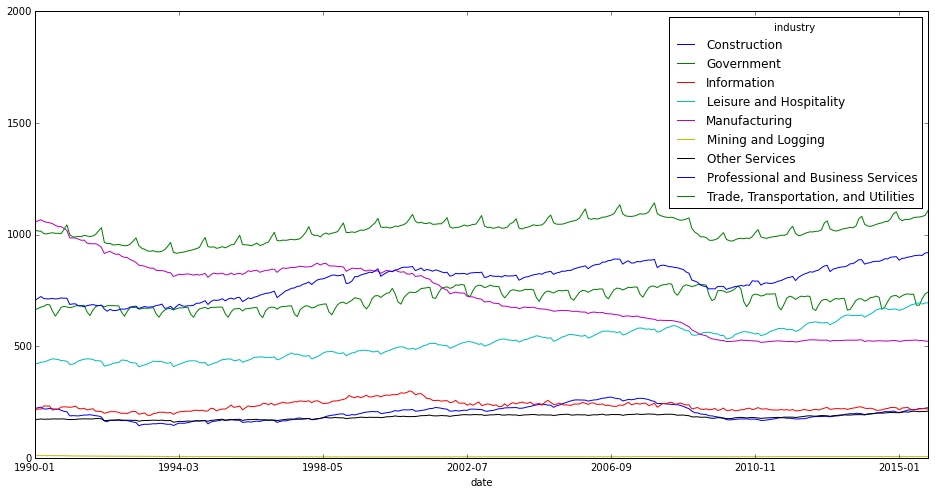

In [177]:
by_date.reset_index().pivot(columns='industry', values='value', index='date').plot(ylim=(0,2000))

In [ ]:
by_date.reset_index().pivot(columns='industry', values='value', index='date').plot

In [175]:
by_date.plot?

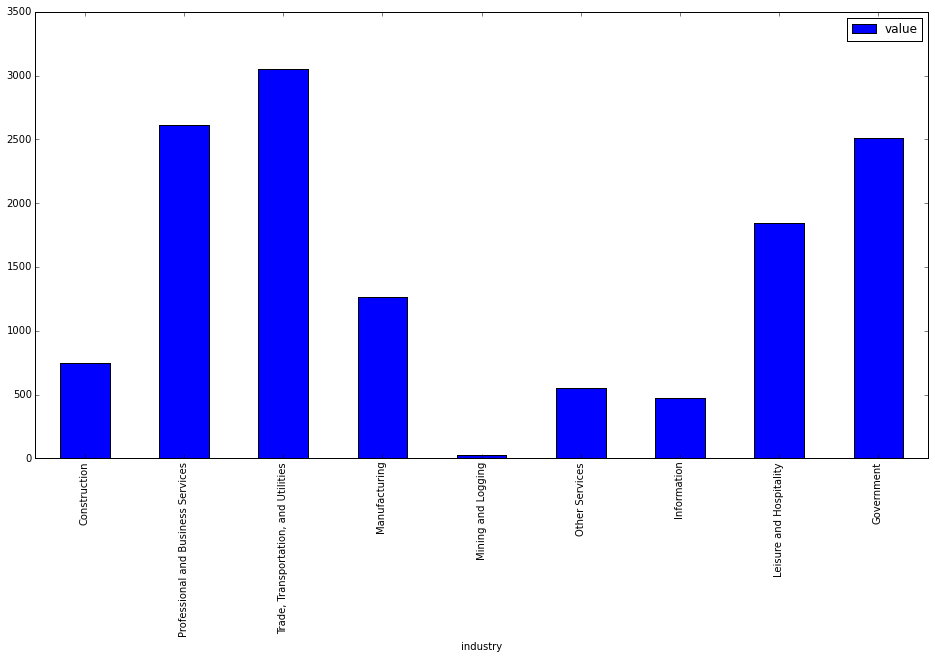

In [151]:
by_date['2015-11':][['industry', 'value']].set_index('industry').plot(kind='bar')

In [27]:
df = all_data.ix['SMU06000000000000001'].query('period_type == "monthly"')[['date', 'value']]

In [28]:
df.head(5)

,date,value
SMU06000000000000001,1939-01,1700.7
SMU06000000000000001,1939-02,1709.4
SMU06000000000000001,1939-03,1731.2
SMU06000000000000001,1939-04,1772.8
SMU06000000000000001,1939-05,1797.9


In [29]:
df.set_index('date', inplace=True)
df = pd.DataFrame(df.value.astype(float))

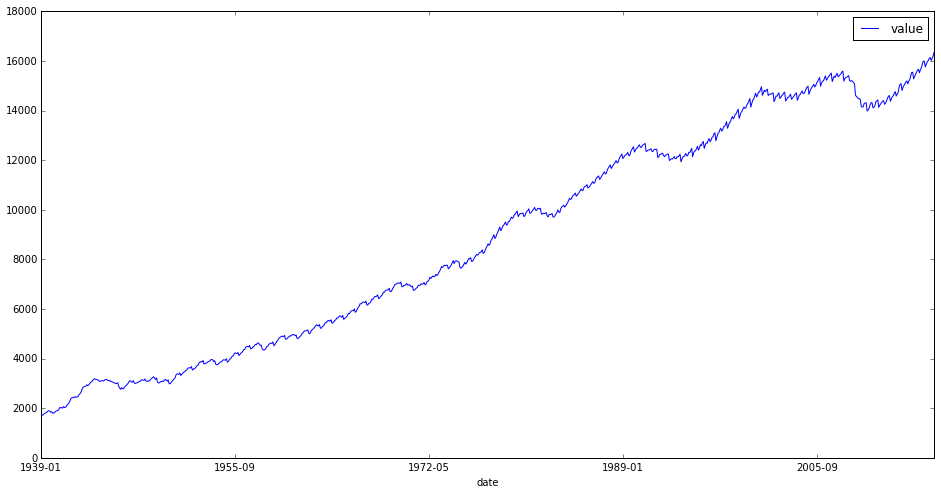

In [30]:
df.plot()

In [31]:
all_data.ix['SMU06000000000000001'].head(1)

,year,period,value,footnote_codes,state,area,industry,seasonally_adjusted,data_type,period_type,date
SMU06000000000000001,1939,M01,1700.7,,California,Statewide,Total Nonfarm,False,"All Employees, In Thousands",monthly,1939-01


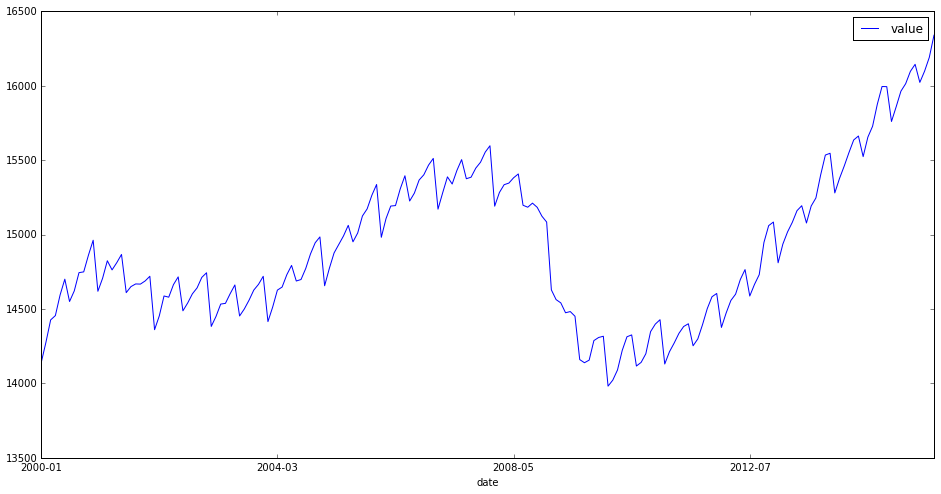

In [32]:
df['2000':].plot()

In [45]:
df = all_data.query('industry == "Restaurants" & area == "Los Angeles-Long Beach-Anaheim, CA" '
                    '& period_type == "monthly"')[['date', 'value']].copy()

In [46]:
df.set_index('date', inplace=True)
df = pd.DataFrame(df.value.astype(float))

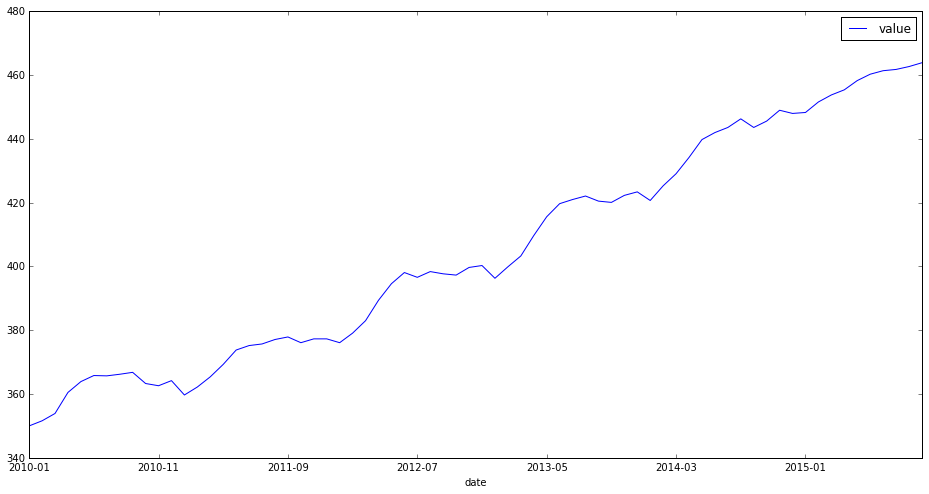

In [47]:
df['2010':].plot()

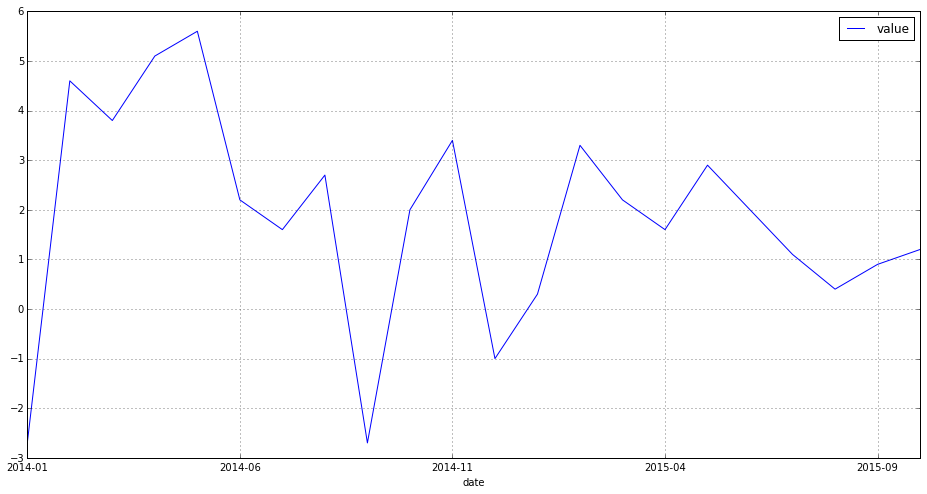

In [36]:
(df - df.shift(1))['2014':].plot(grid=True)

In [38]:
all_data.industry.value_counts().head(30)

Total Nonfarm                                                               472231
Total Private                                                               359678
Manufacturing                                                               231437
Goods Producing                                                             200976
Private Service Providing                                                   200361
Trade, Transportation, and Utilities                                        195519
Leisure and Hospitality                                                     186147
Retail Trade                                                                183189
Professional and Business Services                                          182686
Service-Providing                                                           182460
Government                                                                  182421
Education and Health Services                                               179553
Fina

In [39]:
df = all_data.query('industry == "Leisure and Hospitality" & area == "Los Angeles-Long Beach-Anaheim, CA" '
                    '& period_type == "monthly"')[['date', 'value']].copy()

In [42]:
df.set_index('date', inplace=True)
df = pd.DataFrame(df.value.astype(float))

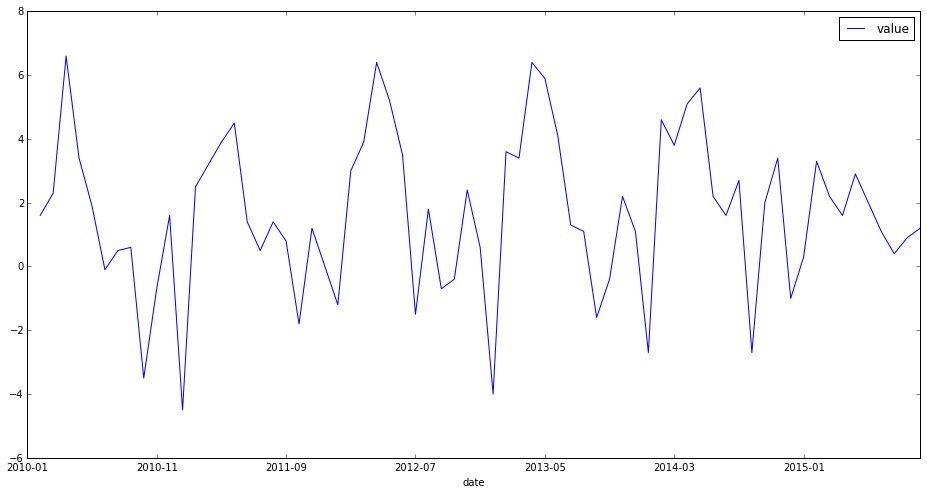

In [50]:
(df['2010':] - df['2010':].shift(1)).plot()

In [48]:
manu = all_data.query('industry == "Manufacturing" & area == "Los Angeles-Long Beach-Anaheim, CA" '
                    '& period_type == "monthly"')[['date', 'value']].copy()
manu.set_index('date', inplace=True)
manu = pd.DataFrame(df.value.astype(float))

In [54]:
industry_codes.keys()[:5], industry_codes.values()[:5]

([0, 31334400, 41424900, 42453000, 31334412],
 ['Total Nonfarm',
  'Semiconductor and Other Electronic Component Manufacturing',
  'Miscellaneous Nondurable Goods Merchant Wholesalers',
  'Miscellaneous Store Retailers',
  'Bare Printed Circuit Board Manufacturing'])